SIRに免疫の時間的忘却項をつけたもの

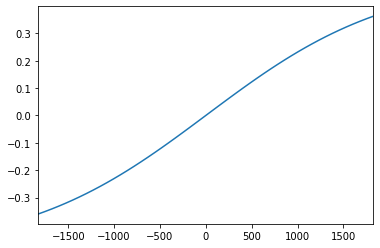

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#条件設定
NUM_OF_DAYS=200 #全日数
beta1=0.9 #original:0.09 #rate of infection
gamma=0.7 #recovery rate

LAMD0=0.001
LIMIT=90 # 免疫を完全に失う日

S0=9273000
I0=92730
R0=[0 for i in range(LIMIT)]
N=S0+I0+sum(R0)

# シグモイド関数もどき
class Beta2():
  def __init__(self, lamd, x0, y0):
    self.lamd=lamd
    self.x0=x0
    self.y0=y0

  def get(self, x):
      S0 = (1 + np.e ** ( self.lamd*(x-self.x0)) )
      S = -1 / S0 - self.y0
      #return 1 / ((1 + np.exp(-a*(x-d))) * np.log(1 + np.exp(-a*(x-d))))
      return S


##テスト
x = np.linspace(-1825,1825)#5年
plt.subplot().set_xlim([-1825, 1825])#5年
#TODO: 0日目に0，LIMIT日目に1になるように調整しないといけない
b2=Beta2(lamd=LAMD0,x0=10,y0=-0.5024999792)
plt.plot(x,b2.get(x))
#print(beta_2(0,0.00001,10,-0.5000249999999792))

In [0]:
class OnedayDatum():
  def __init__(self, k, S, I, R, lamd, indexOfTerm):
    self.k=k
    self.S=S
    self.I=I
    self.R=R[0:LIMIT]
    self.lamd=lamd
    self.indexOfTerm=int(indexOfTerm)

(k=0) 9273000 92730 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[64910.99999999999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

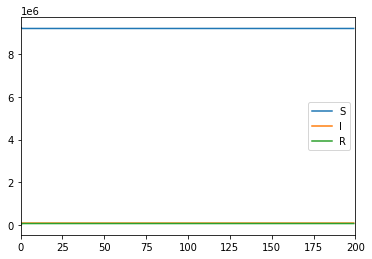

In [23]:

class Model():
  @staticmethod
  def calc(data):#Data[]
    #S,I,Rは時刻tの値を表す
    d=data.get(0)
    S=d.S
    I=d.I
    R=d.R
    lamd=d.lamd
    indexOfTerm=d.indexOfTerm
    print("(k=0)", S, I, R)


    for k in range(1, NUM_OF_DAYS+1):
      #nextd.S,I,Rは時刻k+1の値
      nextd=OnedayDatum(k, S, I, R, lamd, indexOfTerm)

      #原典p.13(下側)の式を実装
      #意味を考えるには上側の式の方が見やすい
      P1 = np.e**-(gamma*beta1*(I/N)) #1個目のexp．括弧内は感染者に当たり感染しない or 出会わない確率？
      nextd.S = P1 * S + R[LIMIT-1] #(1)未感染者: 感染しなかった人数 + R枠から外れた人(免疫の忘却)
      beta2=Beta2(lamd=LAMD0,x0=10,y0=-0.5024999792)
      P2 = sum([1-np.e**-(gamma*beta2.get(t)*(I/N)) for t in range(0,LIMIT-1)]) #2個目のexp: 免疫保持者がIに出会ってかつ感染を免れた or 出会わなかった確率
      nextd.I = (1-P1)*S + (1-gamma)*I  #(2)感染者: 感染者と出会って感染した人数
      for t in range(0,LIMIT):
        nextd.I += P2*R[t]  #
      nextd.I=nextd.I
      #nextd.R[0]=gamma*I
      #for t in range(0,LIMIT): nextd.R[t] = P2*S #感染しなかった(残り)(面倒くさいから計算してないけどたぶんP2であってるはず)
      nextd.R=[gamma*I]+R[0:-2]
      data.set(k, nextd)
      print(k,R[0:LIMIT-1])
      print(data.get(k).R[0:LIMIT-1])
      #print("k=",data.get(k).k, data.get(k).S, data.get(k).I, data.get(k).R, P1, P2)

class Data():
  def __init__(self):#[[S, I, R, lamd, end]]
    # 初期値設定
    r=[0 for i in range(LIMIT)]
    self.data=[OnedayDatum(0, 0, 0, r, 0, 0) for day in range(0,NUM_OF_DAYS+1)]
    self.data[0]=OnedayDatum(0, S0, I0, R0, LAMD0, 0)#S, I, R, lamd, indexOfTerm

  def get(self, i):
    return self.data[i]
  def set(self, i, datum):
    self.data[i]=datum
  def append(self, datum):
    self.data.append(data)

data=Data()
   
#実行
Model.calc(data)
#plot
plt.subplot().set_xlim([0, NUM_OF_DAYS])
plt.plot([data.get(i).S for i in range(0,NUM_OF_DAYS)],label='S')
plt.plot([data.get(i).I for i in range(0,NUM_OF_DAYS)],label='I')
plt.plot([sum(data.get(i).R) for i in range(0,NUM_OF_DAYS)],label='R')

plt.legend()

#for k in range(0,NUM_OF_DAYS): print(k, data.get(k).S, data.get(k).I, data.get(k).R)